In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("covtype.csv")

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
duplicate = df[df.duplicated]
duplicate

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [9]:
df1 = df.copy()

remove_columns = []
for cols in df1.columns:
    if df1[cols].std() <=0.02:
        remove_columns.append(cols)

df1.drop(remove_columns,axis=1,inplace=True)

print(remove_columns)
        

['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 51 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [11]:
df1['Cover_Type'].replace({1:'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4:'Cottonwood/Willow',5:'Aspen',6:'Douglas-fir',7:'Krummholz'},inplace=True)

C:\Users\Enigma\AppData\Local\Temp\ipykernel_23808\2369663449.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Cover_Type'].replace({1:'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4:'Cottonwood/Willow',5:'Aspen',6:'Douglas-fir',7:'Krummholz'},inplace=True)


In [12]:
df1 = df1.rename(columns ={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA","Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA",
                         "Horizontal_Distance_To_Hydrology":"HD_Hydrology","Vertical_Distance_To_Hydrology":"VD_Hydrology",
                          "Horizontal_Distance_To_Roadways":"HD_Roadways","Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})

In [13]:
df1.head()

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,Aspen


In [14]:
df2 = df1.copy()
df2["Wild Areas"] = (df2.iloc[:,10:15]==1).idxmax(1)
df2["Soil Types"] = (df2.iloc[:,15:55]==1).idxmax(1)
df2["Wild Areas"].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Neota_WA'],
      dtype=object)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 53 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Elevation           581012 non-null  int64 
 1   Aspect              581012 non-null  int64 
 2   Slope               581012 non-null  int64 
 3   HD_Hydrology        581012 non-null  int64 
 4   VD_Hydrology        581012 non-null  int64 
 5   HD_Roadways         581012 non-null  int64 
 6   Hillshade_9am       581012 non-null  int64 
 7   Hillshade_Noon      581012 non-null  int64 
 8   Hillshade_3pm       581012 non-null  int64 
 9   HD_Fire_Points      581012 non-null  int64 
 10  Rawah_WA            581012 non-null  int64 
 11  Neota_WA            581012 non-null  int64 
 12  Comanche_Peak_WA    581012 non-null  int64 
 13  Cache_la_Poudre_WA  581012 non-null  int64 
 14  Soil_Type1          581012 non-null  int64 
 15  Soil_Type2          581012 non-null  int64 
 16  So

In [16]:
#removing the unwanted columns
df2 = df2.drop(columns=["Rawah_WA","Neota_WA","Comanche_Peak_WA","Cache_la_Poudre_WA","Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6",
                  "Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20",
                  "Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31"
                  ,"Soil_Type32","Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40"])


In [17]:
df = df2

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Elevation       581012 non-null  int64 
 1   Aspect          581012 non-null  int64 
 2   Slope           581012 non-null  int64 
 3   HD_Hydrology    581012 non-null  int64 
 4   VD_Hydrology    581012 non-null  int64 
 5   HD_Roadways     581012 non-null  int64 
 6   Hillshade_9am   581012 non-null  int64 
 7   Hillshade_Noon  581012 non-null  int64 
 8   Hillshade_3pm   581012 non-null  int64 
 9   HD_Fire_Points  581012 non-null  int64 
 10  Cover_Type      581012 non-null  object
 11  Wild Areas      581012 non-null  object
 12  Soil Types      581012 non-null  object
dtypes: int64(10), object(3)
memory usage: 57.6+ MB


###### we can see that now the memory usage has been reduced here so it seems a best approach since this is a huge dataset and we might use a lot of memory if the dataset has been used with 55 colums as before

#### Trying to explore the data with categorical and numerical values

In [21]:
num_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f"we have {len(num_columns)} numerical columns : {num_columns}")
print(f"we have {len(cat_columns)} categorical columns: {cat_columns}")

we have 10 numerical columns : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
we have 3 categorical columns: ['Cover_Type', 'Wild Areas', 'Soil Types']


## Univariate Analysis

This is analysis of help us to understand the distribution of values of a single variable of categorical and numerical analysis

##### Numerical Features Analysis

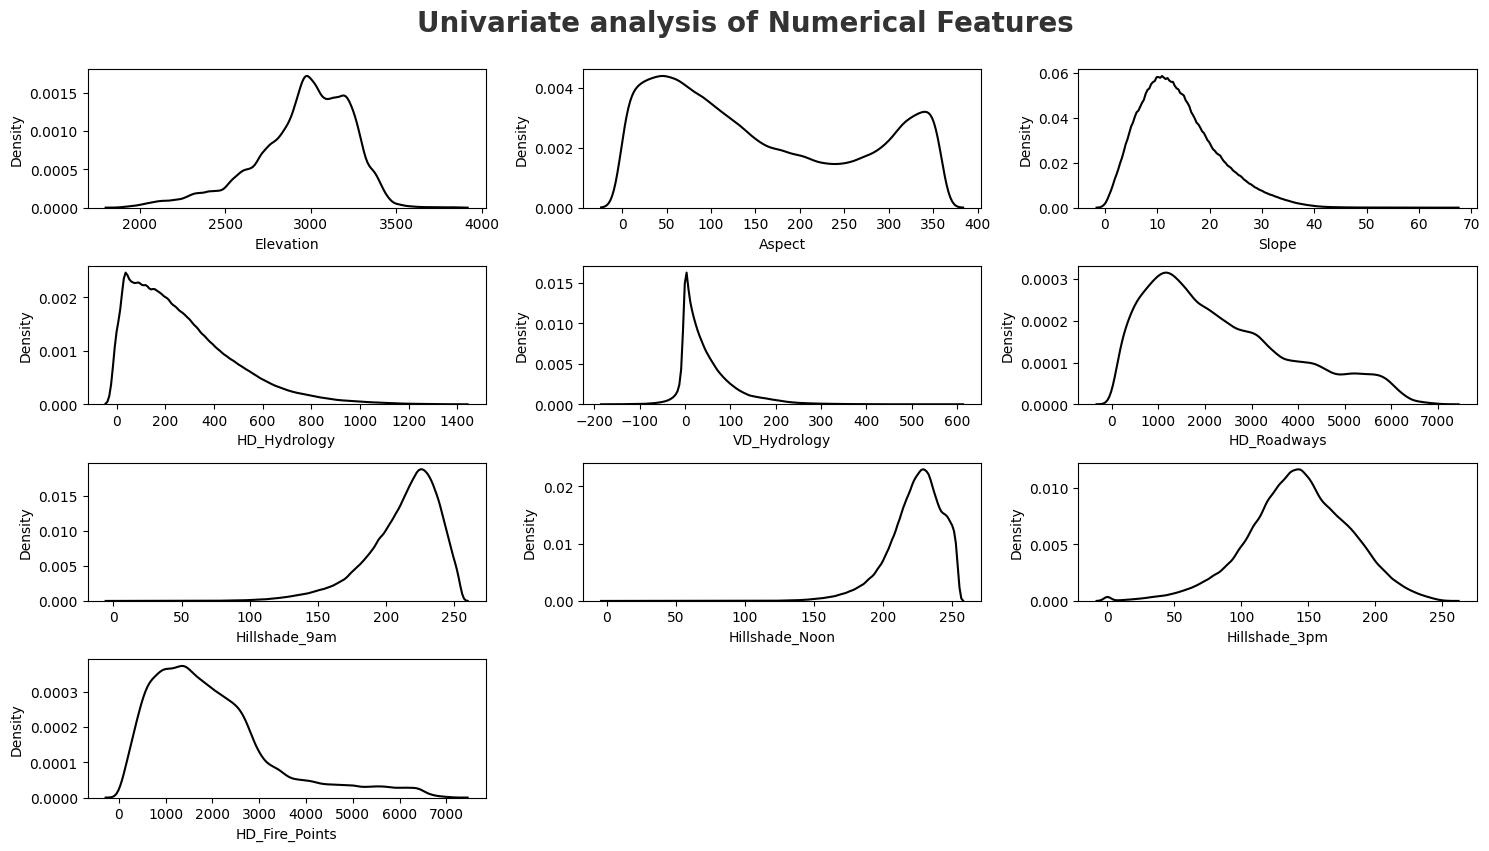

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))

plt.suptitle('Univariate analysis of Numerical Features',fontsize =20,fontweight ='bold',alpha =0.8,y=1)

for i in range(0,len(num_columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df[num_columns[i]], color='black')
    plt.xlabel(num_columns[i])
    plt.tight_layout()

##### Categorical Features Analysis

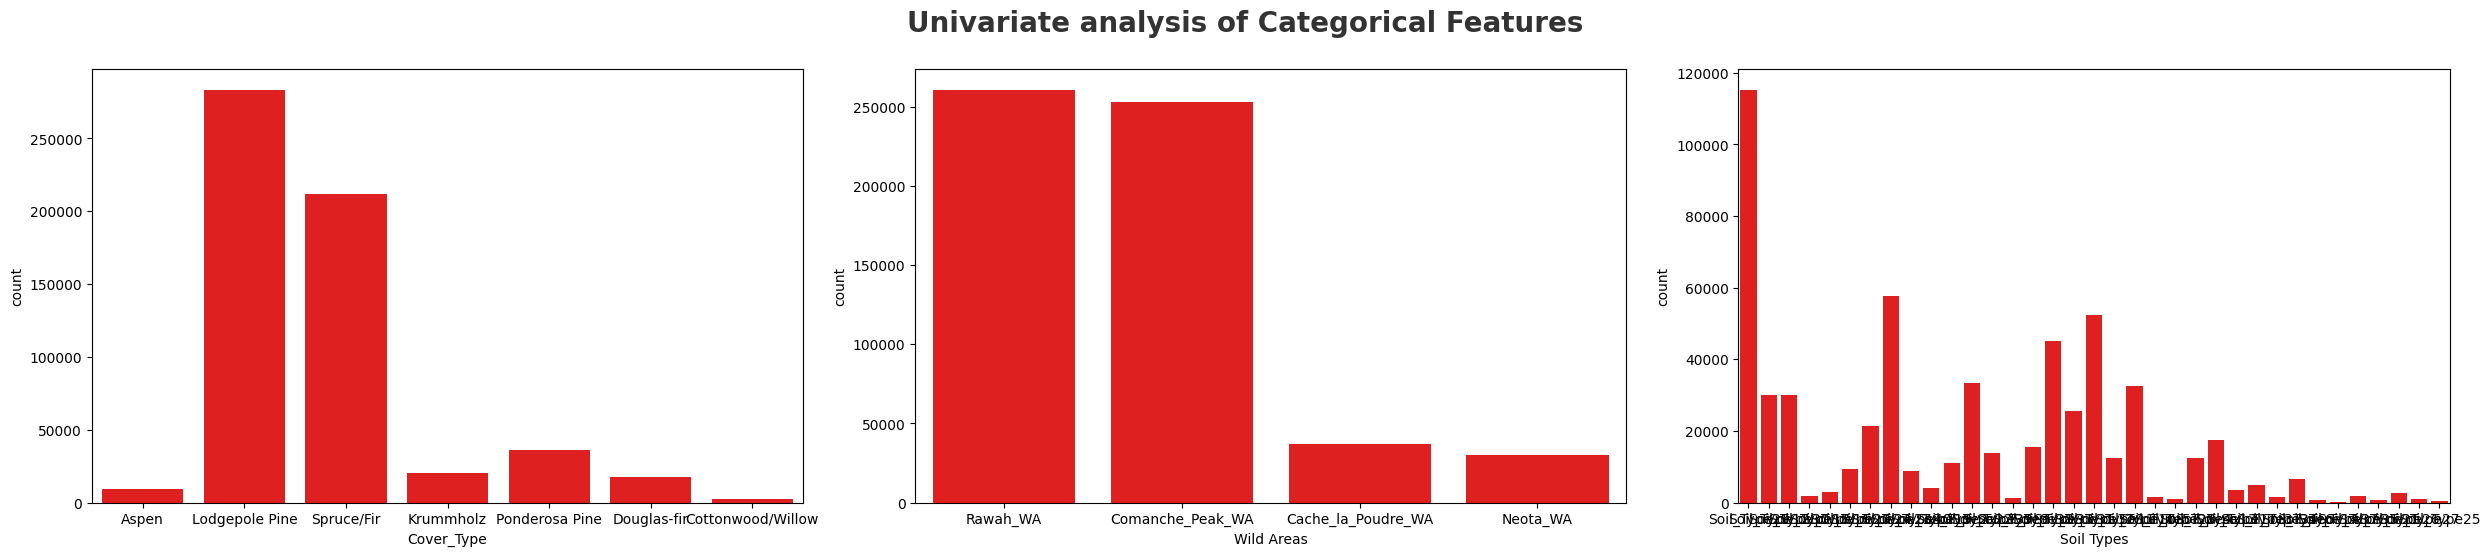

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,10))

plt.suptitle('Univariate analysis of Categorical Features',fontsize =20,fontweight ='bold',alpha =0.8,y=1)

for i in range(0,len(cat_columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(x = df[cat_columns[i]],color='red')
    plt.xlabel(cat_columns[i])
    plt.tight_layout()

#### The above observations were found on the plotting the univariate analysis:
1. The numerical feature has been found has some plots which has skewness on it we need to bring down these distributions by applying proper scaling alogrithms to keep the gausian distribution for further analysis.
2. The categorical features seems has imbalanced dataset on all of them we would need to employ some techniques to balance the datasets for further training

### Multivariate Analysis

multivariate analysis is the analysis of more than one variable dependent on the variable

In [30]:
discrete_features = [feature for feature in num_columns if (len(df[feature].unique())<=25 and len(df[feature].unique())>3)]
continous_features = [feature for feature in num_columns if  len(df[feature].unique())> 25 ]
encoded_categorical = [feature for feature in num_columns if len(df[feature].unique()) <= 3]

print(f"we have {len(discrete_features)} categorical columns : {discrete_features}")
print(f"we have {len(continous_features)} numerical columns: {continous_features}")
print(f"we have {len(encoded_categorical)} encoded_categorical columns: {encoded_categorical}")

we have 0 categorical columns : []
we have 10 numerical columns: ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
we have 0 encoded_categorical columns: []


##### Checking in numerical features

In [32]:
feat = df[(list(df[continous_features])[1:])].corr()

<Axes: >

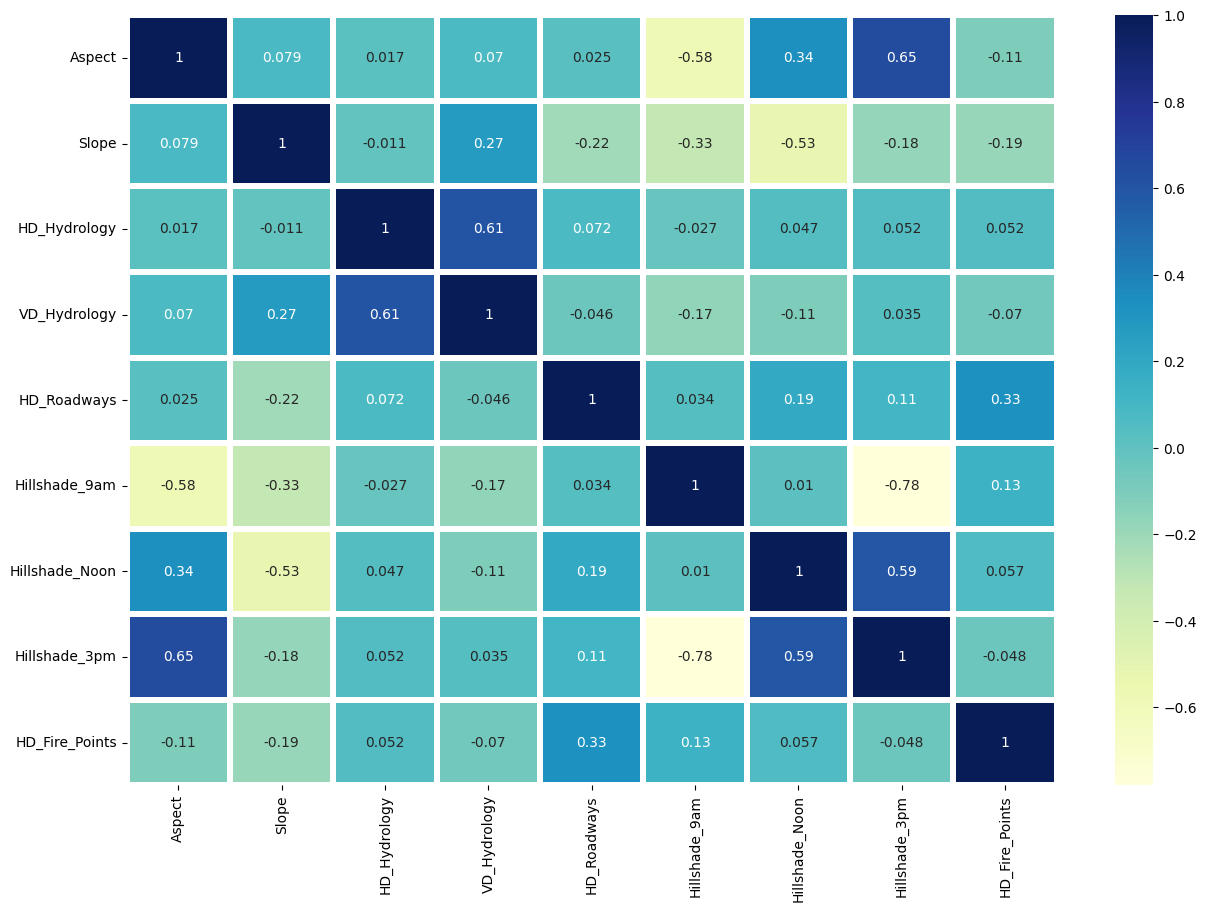

In [33]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(feat,annot=True,linewidths=3,cmap='YlGnBu')

#### Observations from the above correlation heatmaps

1. hillshade 9am and hillshade 3pm - highly negatively correlated
2. hilshade noon and hillshade 3 pm - highly positively correlated
3. VD_hydrology and HD_hydrology - highly positively correlated
4. Aspect and hillshade 3pm -  highly postively correlated
5. slope and hillside noon - highly negatively correlated
6. hillside 9 am and aspect - highly negatively correlated

### Checking multicollinearity in categorical variables

#### We can use Chi square test to check the if the variales are dependent on each other
we test the correlation of the categorical columns with the target column ie covertype 

#### Hypothesis:

###### Null Hypothesis- H0 - The variables are correlated
###### Alternative hypothesis - H1 - the variables are not correlated

In [39]:
!pip install scipy

In [40]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_columns:
    if chi2_contingency(pd.crosstab(df['Cover_Type'],df[feature]))[1]<0.05:
        chi2_test.append("Reject Null hypothesis")
    else:
        chi2_test.append("failed to Reject Null hypothesis")
result = pd.DataFrame(data=[cat_columns,chi2_test]).T
result.columns = ['Column','hypothesis result']
result                  

,Column,hypothesis result
0,Cover_Type,Reject Null hypothesis
1,Wild Areas,Reject Null hypothesis
2,Soil Types,Reject Null hypothesis


##### Hence we did not find any multicollinearity between the target variables

### Checking Null Values

In [43]:
df.isnull().sum()

Elevation         0
Aspect            0
Slope             0
HD_Hydrology      0
VD_Hydrology      0
HD_Roadways       0
Hillshade_9am     0
Hillshade_Noon    0
Hillshade_3pm     0
HD_Fire_Points    0
Cover_Type        0
Wild Areas        0
Soil Types        0
dtype: int64

#### Distribution of cover types

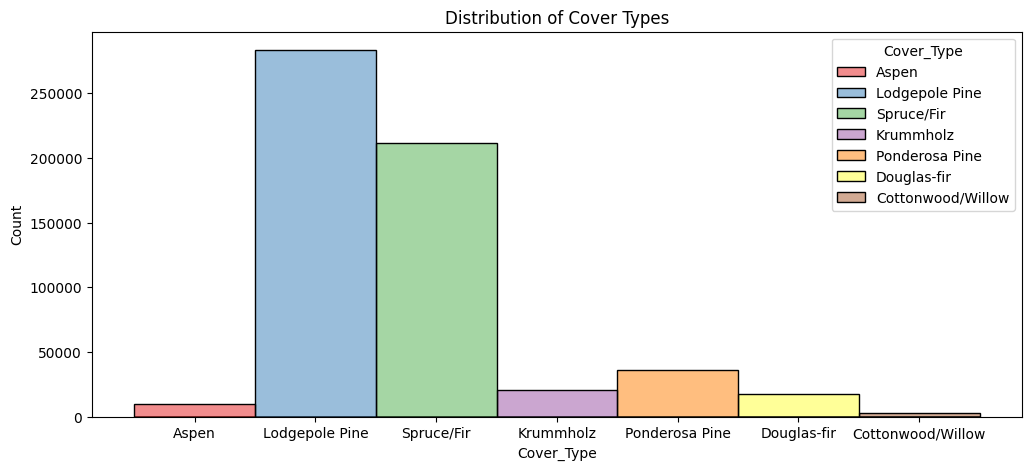

In [45]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,x = 'Cover_Type', hue='Cover_Type',palette='Set1')
plt.title("Distribution of Cover Types")
plt.show()

##### Inference
1. Logdepole Pine and Cottonwood/Willow has the highest and lowest forest cover respectively
2. This seems the target is highly imbalanced dataset and we have to fix this issue here

#### What type of wild areas of has what types of forest cover

<Axes: xlabel='Wild Areas'>

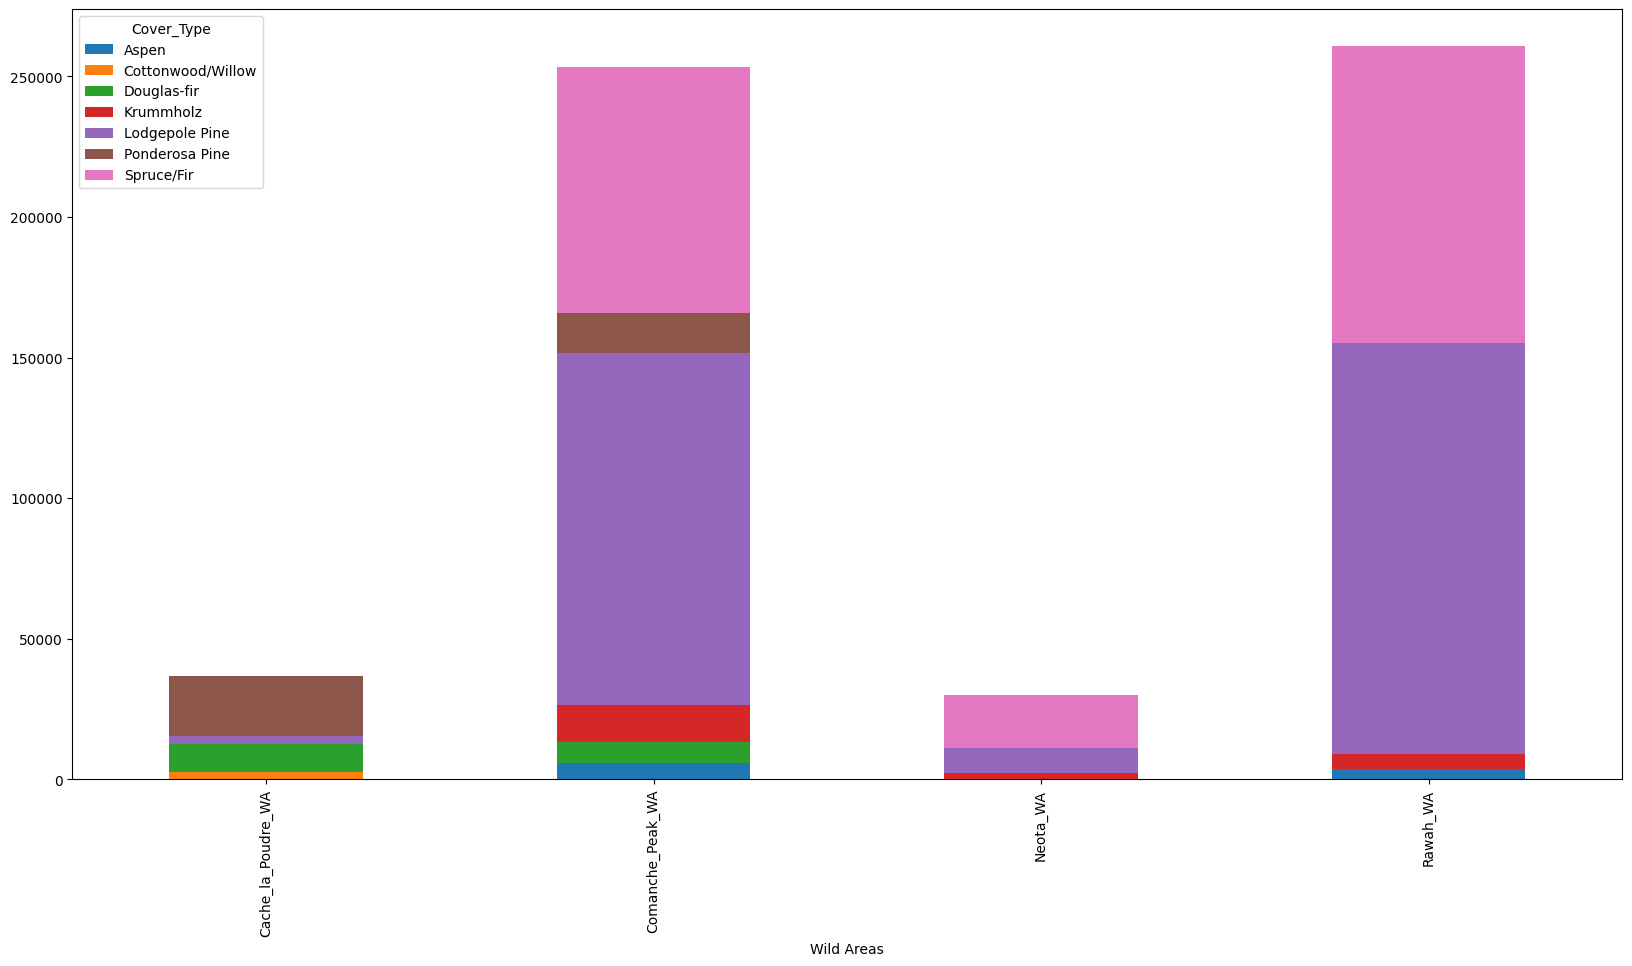

In [48]:
area_forest_cover = df.groupby(['Wild Areas'])['Cover_Type'].value_counts().unstack()
area_forest_cover.plot(kind='bar',stacked=True,figsize=(20,10))

#### Inferences
1. No same distribution cover types in the forest
2. Comanche peak has about 42% of the whole forest
3. both the Cache la Poudre and Neota has similar forest covers and comanche peak and pawah has the similar forest covers
4. cottonwood is found in only in cache la poudre this might be due it could be related to altitude

### Lets check the scatter plot of the elevation and forest cover

C:\Users\Enigma\anaconda3\envs\FC\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


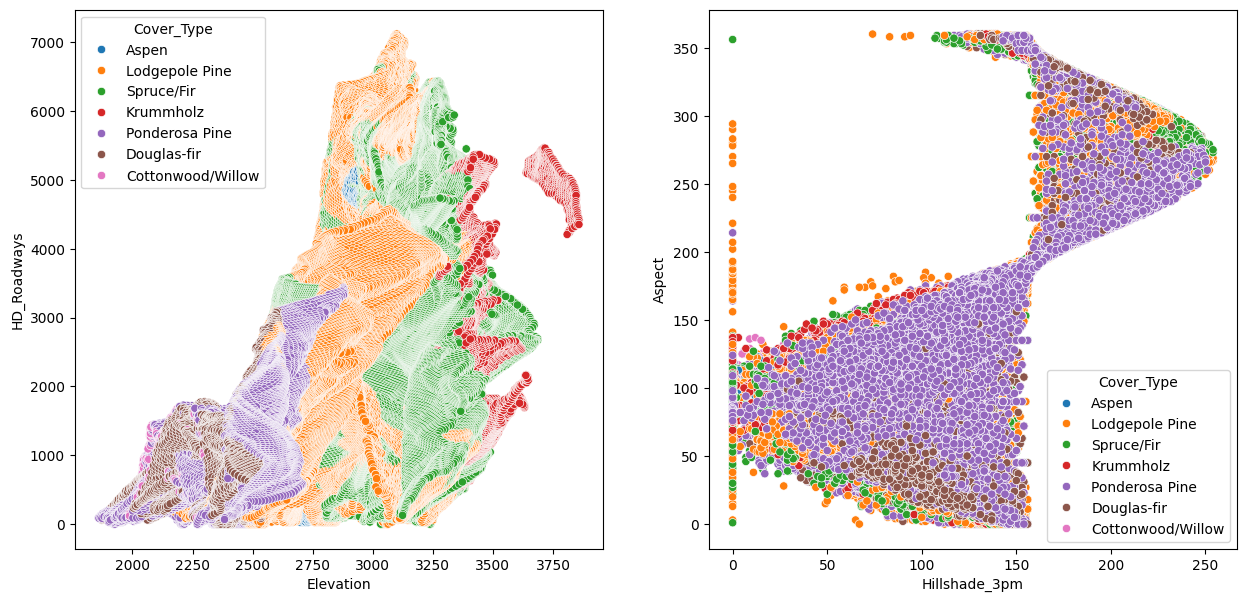

In [51]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.scatterplot(data=df, y='HD_Roadways',x='Elevation',hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df, y='Aspect',x='Hillshade_3pm',hue='Cover_Type')
plt.show()

##### Inferences
cottonwood has lowest in the elevation and Krummholz are on the highest elevation on the roads from the distance to roadways this says that they have a postive correlation on the elevation


#### Lets check the soil types in the dataset

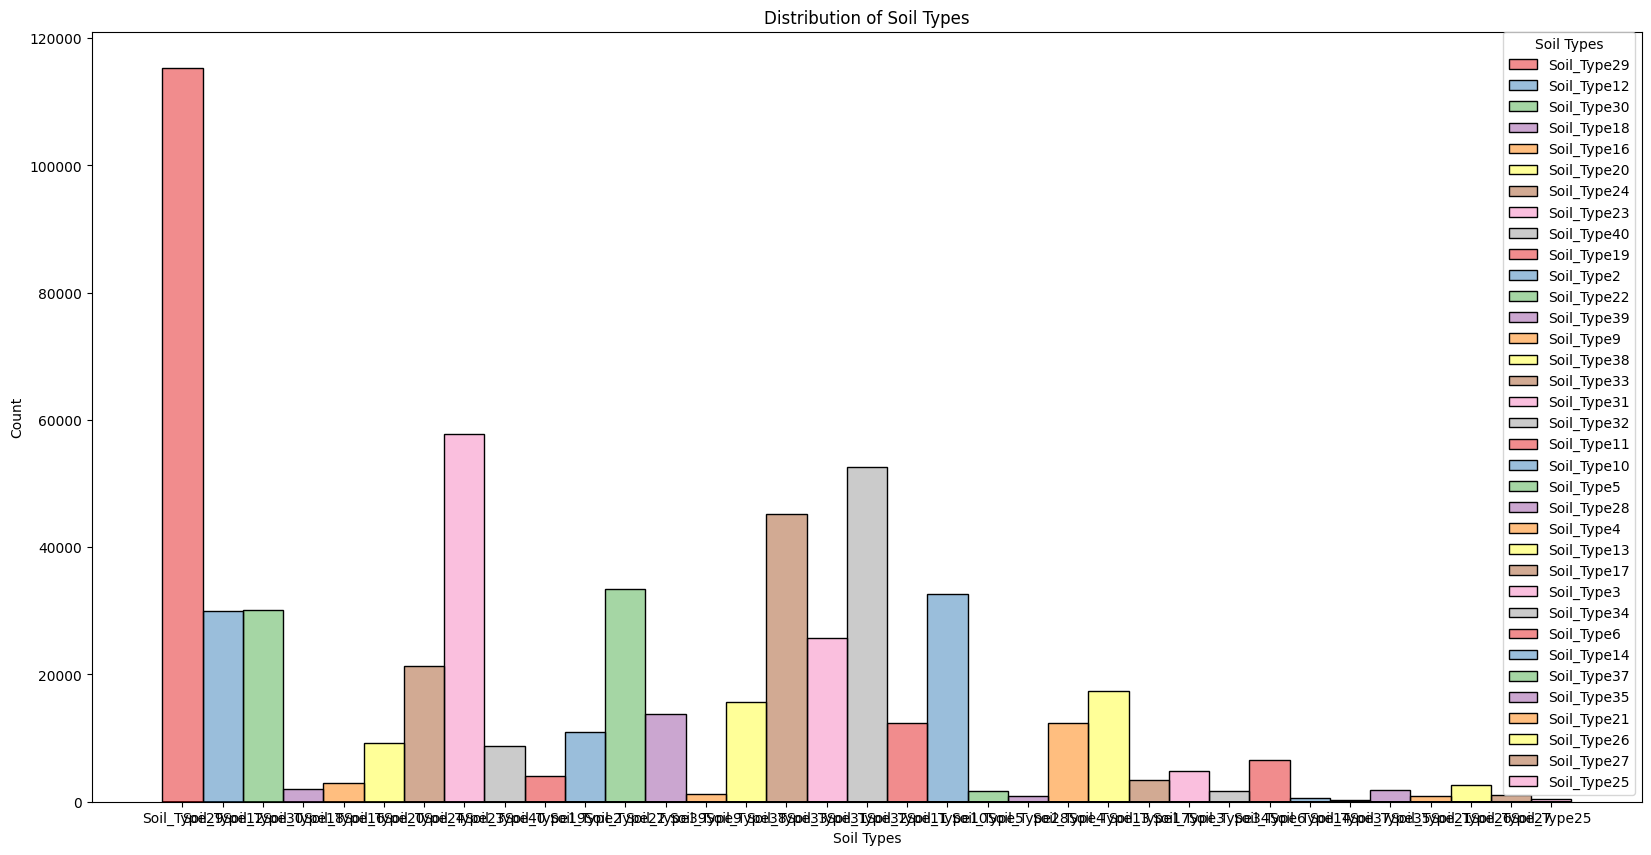

In [54]:
plt.figure(figsize=(20,10))
sns.histplot(data=df,x = 'Soil Types', hue='Soil Types',palette='Set1')
plt.title("Distribution of Soil Types")
plt.show()

##### Inferences
1. only soil type 29 and soil type 18 is containes in the most types of forest
2. most of the soil types are rare

### Let's check the outliers in the data

C:\Users\Enigma\AppData\Local\Temp\ipykernel_23808\2147544901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[col],orient='h',palette=color)
C:\Users\Enigma\AppData\Local\Temp\ipykernel_23808\2147544901.py:6: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.boxplot(df[col],orient='h',palette=color)
C:\Users\Enigma\AppData\Local\Temp\ipykernel_23808\2147544901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[col],orient='h',palette=color)
C:\Users\Enigma\AppData\Local\Temp\ipykernel_23808\2147544901.py:6: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.boxplot(df[col],orient

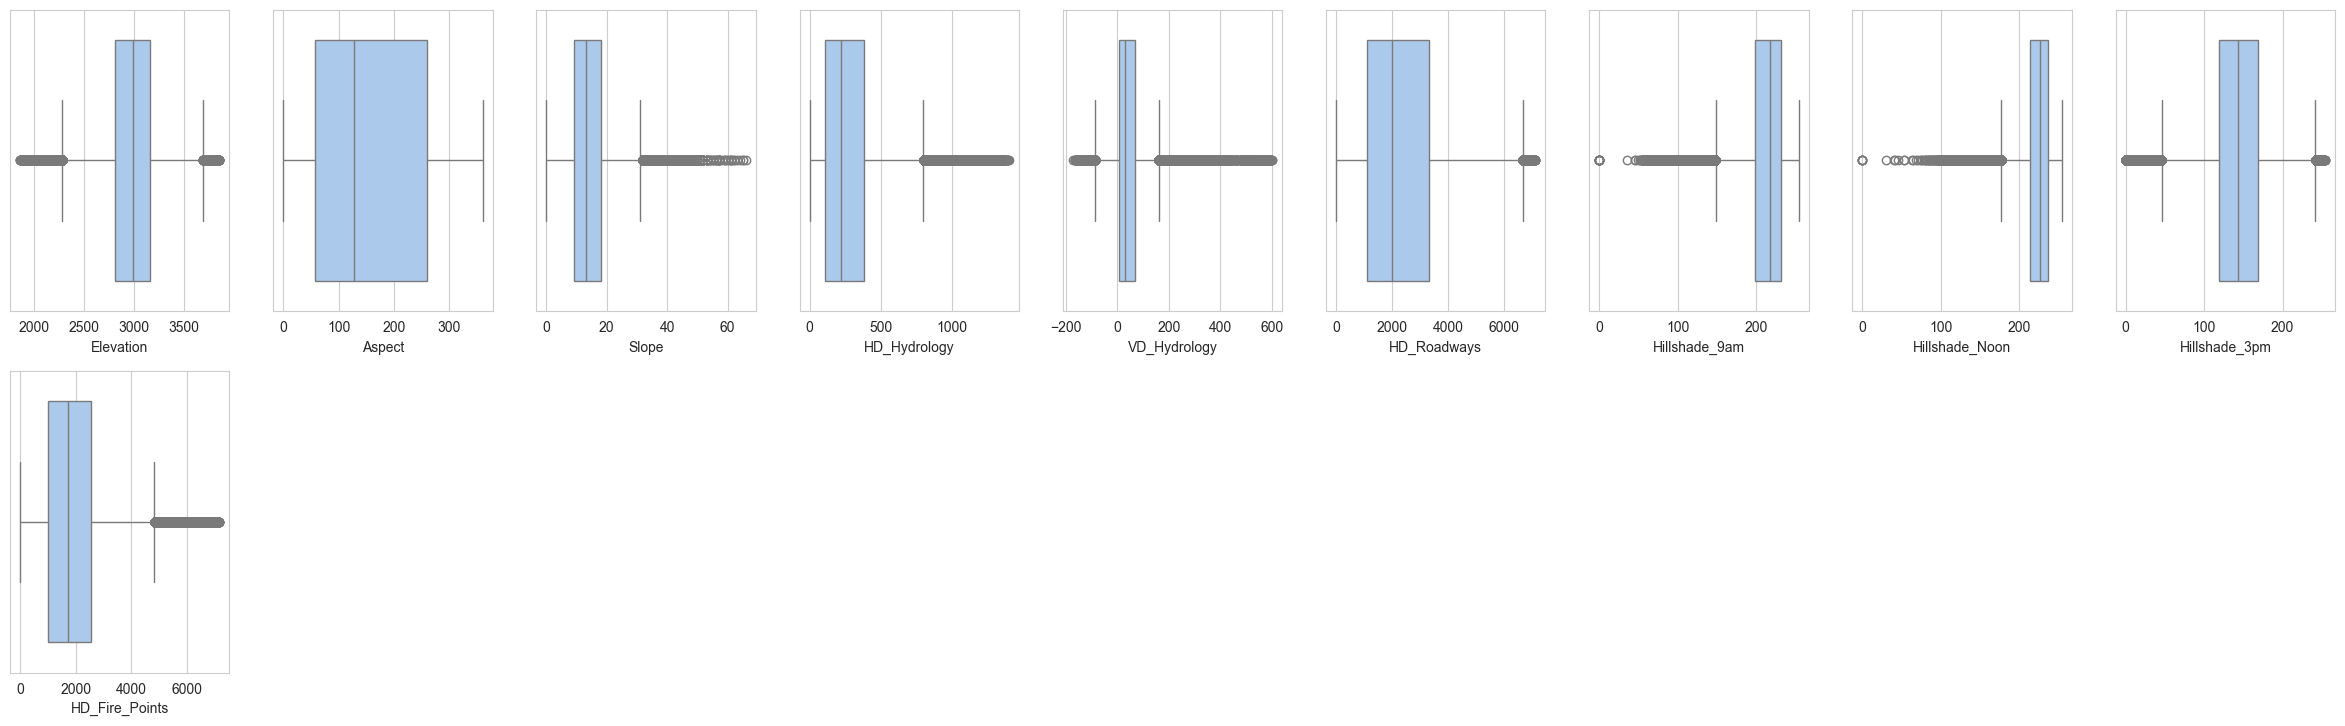

In [100]:
sns.set_style("whitegrid")
color = sns.color_palette("pastel")
plt.figure(figsize=(30,18))
for i, col in enumerate(continous_features):
    plt.subplot(4,9,i+1)
    sns.boxplot(df[col],orient='h',palette=color)


##### Inferences
1. HD Roadways and HD Firepoints has the maximum data spread
2. Slope graph is pretty much pressed on the left side it has a lot of ouliers
3. Elevation seems to have starting from 2000 m
4. VD hydrology seems to have negative values this might tell some of the data seems inconsistent and need sampling

### Let's plot the line graphs of the positive and negative correlations about the multicollinearity

##### Postive MultiCollinearity

<Axes: xlabel='VD_Hydrology', ylabel='HD_Hydrology'>

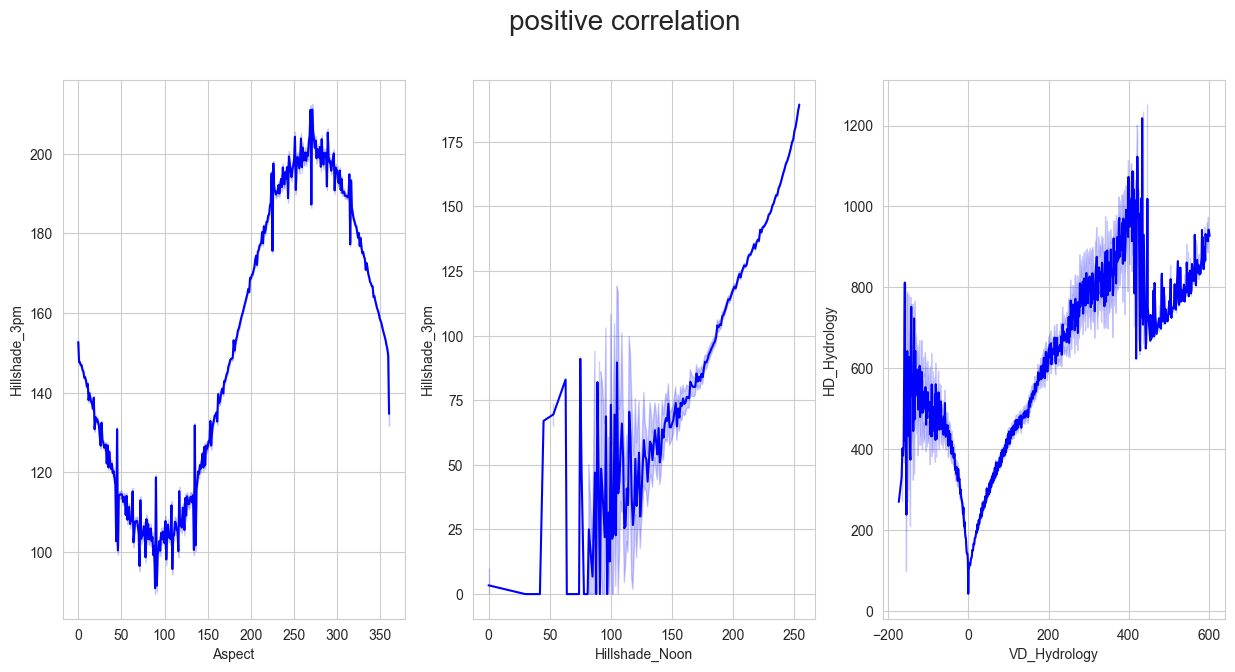

In [98]:
# hillshade noon and hillshade 3 pm - highly positively correlated
# VD_hydrology and HD_hydrology - highly positively correlated
fig, axs = plt.subplots(ncols=3,figsize=(15,7))
fig.suptitle("positive correlation",fontsize=20)
sns.lineplot(data = df,x='Aspect',y = 'Hillshade_3pm',color='blue',ax=axs[0])
sns.lineplot(data = df,x='Hillshade_Noon',y = 'Hillshade_3pm',color='blue',ax=axs[1])
sns.lineplot(data = df,x='VD_Hydrology',y = 'HD_Hydrology',color='blue',ax=axs[2])

##### Negative MultiCollinearity

1. hillshade 9am and hillshade 3pm - highly negatively correlated
2. Aspect and hillshade 3pm - highly negatively correlated
3. slope and hillside noon - highly negatively correlated

<Axes: xlabel='Hillshade_9am', ylabel='Hillshade_3pm'>

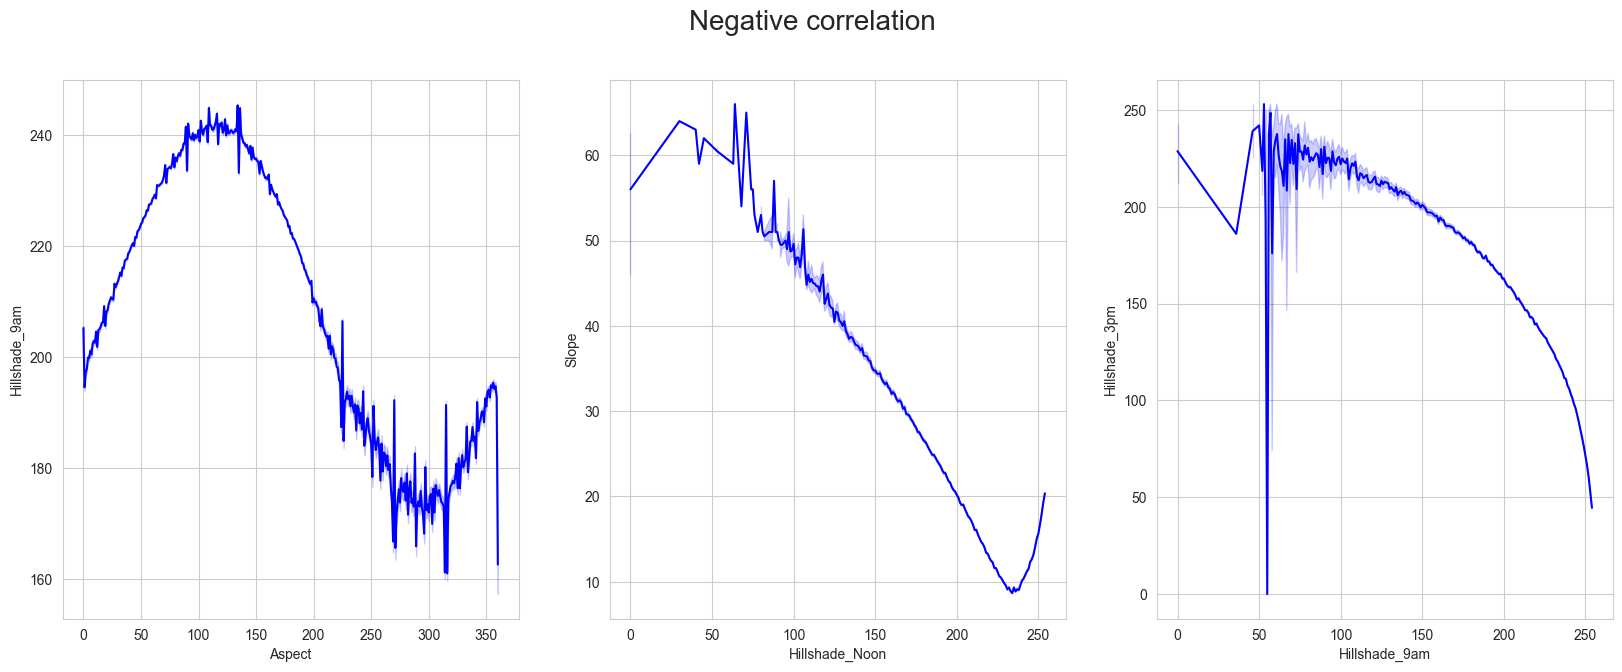

In [96]:
fig, axs = plt.subplots(ncols=3,figsize=(20,7))
fig.suptitle("Negative correlation",fontsize=20)
sns.lineplot(data = df,x='Aspect',y = 'Hillshade_9am',color='blue',ax=axs[0])
sns.lineplot(data = df,x='Hillshade_Noon',y = 'Slope',color='blue',ax=axs[1])
sns.lineplot(data = df,x='Hillshade_9am',y = 'Hillshade_3pm',color='blue',ax=axs[2])